# **QQMM-embed Model(Problematic)**
Tried to load the model from hugging face only but its configuration file there is corrupted so in the later cells i tried to clone the github repo and load its weights from huggingface and combine them to run

In [ ]:
!pip install torch transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
# Solution 1: Try loading with specific parameters
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "youzexue/QQMM-embed-v1"

# Method 1: Load with revision parameter (sometimes helps with config issues)
try:
    tokenizer = AutoTokenizer.from_pretrained(
        model_name,
        trust_remote_code=True,
        revision="main"
    )
    model = AutoModel.from_pretrained(
        model_name,
        trust_remote_code=True,
        revision="main"
    )
    print("✅ Successfully loaded QQMM-embed-v1 with revision=main")
except Exception as e:
    print(f"❌ Method 1 failed: {e}")

# Method 2: Try with cache_dir and force_download
try:
    tokenizer = AutoTokenizer.from_pretrained(
        model_name,
        trust_remote_code=True,
        force_download=True,
        cache_dir="./cache"
    )
    model = AutoModel.from_pretrained(
        model_name,
        trust_remote_code=True,
        force_download=True,
        cache_dir="./cache"
    )
    print("✅ Successfully loaded QQMM-embed-v1 with force_download")
except Exception as e:
    print(f"❌ Method 2 failed: {e}")

# Method 3: Load with local_files_only=False explicitly
try:
    tokenizer = AutoTokenizer.from_pretrained(
        model_name,
        trust_remote_code=True,
        local_files_only=False
    )
    model = AutoModel.from_pretrained(
        model_name,
        trust_remote_code=True,
        local_files_only=False
    )
    print("✅ Successfully loaded QQMM-embed-v1 with local_files_only=False")
except Exception as e:
    print(f"❌ Method 3 failed: {e}")

# Method 4: Try with different torch_dtype
try:
    tokenizer = AutoTokenizer.from_pretrained(
        model_name,
        trust_remote_code=True
    )
    model = AutoModel.from_pretrained(
        model_name,
        trust_remote_code=True,
        torch_dtype=torch.float16,
        device_map="auto"
    )
    print("✅ Successfully loaded QQMM-embed-v1 with torch_dtype=float16")
except Exception as e:
    print(f"❌ Method 4 failed: {e}")

# Method 5: Check model files and configuration
from huggingface_hub import list_repo_files, hf_hub_download
import json

try:
    # List files in the repository
    files = list_repo_files(model_name)
    print("📁 Files in repository:", files)

    # Download and check config
    config_path = hf_hub_download(repo_id=model_name, filename="config.json")
    with open(config_path, 'r') as f:
        config = json.load(f)
    print("⚙️ Model config keys:", list(config.keys()))

    # Check for problematic config values
    if '_name_or_path' in config:
        print(f"🔍 _name_or_path in config: {config['_name_or_path']}")
    if 'model_type' in config:
        print(f"🔍 model_type: {config['model_type']}")

except Exception as e:
    print(f"❌ Config inspection failed: {e}")

# Method 6: Try using sentence-transformers if it's compatible
try:
    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer(model_name)
    print("✅ Successfully loaded QQMM-embed-v1 with sentence-transformers")
except Exception as e:
    print(f"❌ sentence-transformers failed: {e}")

# Method 7: Manual config override
try:
    from transformers import AutoConfig

    # Load config and modify problematic paths
    config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)

    # Override any problematic path references
    if hasattr(config, '_name_or_path'):
        config._name_or_path = model_name

    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    model = AutoModel.from_pretrained(model_name, config=config, trust_remote_code=True)
    print("✅ Successfully loaded QQMM-embed-v1 with config override")
except Exception as e:
    print(f"❌ Method 7 failed: {e}")

print("\n🎯 Try each method above until one works!")

❌ Method 1 failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.


config.json: 0.00B [00:00, ?B/s]

configuration_qqmm.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/youzexue/QQMM-embed-v1:
- configuration_qqmm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json: 0.00B [00:00, ?B/s]

❌ Method 2 failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.
❌ Method 3 failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.
❌ Method 4 failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.
📁 Files in repository: ['.gitattributes', 'README.md', 'config.json', 'configuration_qqmm.py', 'generation_config.json', 'model-00001-of-00004.safetensors', 'model-00002-of-00004.safetensors', 'model-00003-of-00004.safetensors', 'model-00004-of-00004.safetensors', 'model.safetensors.index.json', 'modeling_qqmm.py']
⚙️ Model config keys: ['architectures', 'auto_map', 'image_token_id', 'language_model_config', 'model_type', 'torch_dtype', 'transformers_version', 'vision_abstractor_config', 'vision_model_conf

❌ sentence-transformers failed: The repository youzexue/QQMM-embed-v1 contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/youzexue/QQMM-embed-v1 .
 You can inspect the repository content at https://hf.co/youzexue/QQMM-embed-v1.
Please pass the argument `trust_remote_code=True` to allow custom code to be run.
❌ Method 7 failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.

🎯 Try each method above until one works!


In [ ]:
# Simple fix: Try sentence-transformers with trust_remote_code
from sentence_transformers import SentenceTransformer
import torch

model_name = "youzexue/QQMM-embed-v1"

print("🚀 Loading QQMM-embed-v1 with sentence-transformers...")

try:
    # Load with sentence-transformers and trust_remote_code
    model = SentenceTransformer(model_name, trust_remote_code=True)
    print("✅ Model loaded successfully!")

    # Test the model
    test_sentences = [
        "Hello world",
        "This is a test sentence",
        "QQMM embedding model test"
    ]

    print("🧪 Testing model with sample sentences...")
    embeddings = model.encode(test_sentences)

    print(f"✅ Success! Generated embeddings with shape: {embeddings.shape}")
    print(f"📊 Embedding dimension: {embeddings.shape[1]}")
    print(f"🔢 Number of sentences: {embeddings.shape[0]}")

    # Show similarity between sentences
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    similarities = cosine_similarity(embeddings)
    print(f"📈 Similarity matrix shape: {similarities.shape}")
    print("🎯 Sample similarity scores:")
    for i in range(len(test_sentences)):
        for j in range(i+1, len(test_sentences)):
            sim = similarities[i][j]
            print(f"  '{test_sentences[i]}' ↔ '{test_sentences[j]}': {sim:.4f}")

except Exception as e:
    print(f"❌ sentence-transformers failed: {e}")

    # Fallback: Try the manual fix approach
    print("\n🔄 Trying manual configuration fix...")

    from transformers import AutoTokenizer, AutoModel
    from huggingface_hub import hf_hub_download
    import os

    # Download and modify the config files
    config_path = hf_hub_download(repo_id=model_name, filename="configuration_qqmm.py")

    # Read and fix the configuration file
    with open(config_path, 'r') as f:
        content = f.read()

    # Replace the problematic reference
    fixed_content = content.replace(
        'qqmm/models/Qwen2-VL-7B-Instruct-NaViT',
        model_name
    )

    # Write back the fixed content
    with open(config_path, 'w') as f:
        f.write(fixed_content)

    print("✅ Fixed configuration file")

    # Try loading again
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
        model = AutoModel.from_pretrained(model_name, trust_remote_code=True)
        print("✅ Model loaded successfully with manual fix!")

    except Exception as e2:
        print(f"❌ Manual fix also failed: {e2}")
        print("💡 The model may have deeper configuration issues that need to be reported to the author.")

🚀 Loading QQMM-embed-v1 with sentence-transformers...
❌ sentence-transformers failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.

🔄 Trying manual configuration fix...
✅ Fixed configuration file
❌ Manual fix also failed: Repo id must be in the form 'repo_name' or 'namespace/repo_name': 'qqmm/models/Qwen2-VL-7B-Instruct-NaViT'. Use `repo_type` argument if needed.
💡 The model may have deeper configuration issues that need to be reported to the author.


# **QQMM-embed(Working)**

I got cloned the model from its github repo and got its weights from huggingface to test its multi-lingual and it gave some pretty well results which indicates its multilingual.
Here I made some changes in the model files such as,


1.   TypeError: only integer tensors of a single element can be converted to an index

solution:

def to_tensor(self, inputs):
    input_ids = inputs['input_ids']
    if isinstance(input_ids[0], list):
        tensor_input_ids = torch.tensor(input_ids, dtype=torch.long)
    else:
        tensor_input_ids = torch.tensor([input_ids], dtype=torch.long)
    inputs['input_ids'] = tensor_input_ids

    attention_mask = inputs['attention_mask']
    if isinstance(attention_mask[0], list):
        tensor_attention_mask = torch.tensor(attention_mask, dtype=torch.bool)
    else:
        tensor_attention_mask = torch.tensor([attention_mask], dtype=torch.bool)
    inputs['attention_mask'] = tensor_attention_mask

    if 'prompt_mask' in inputs:
        prompt_mask = inputs['prompt_mask']
        if isinstance(prompt_mask[0], list):
            tensor_prompt_mask = torch.tensor(prompt_mask, dtype=torch.bool)
        else:
            tensor_prompt_mask = torch.tensor([prompt_mask], dtype=torch.bool)
        inputs['prompt_mask'] = tensor_prompt_mask

    return inputs
update this file in
content/QQMM-embed/qqmm/models/qqmm_nav_qwen2/prcessing_utils.py




2.   Updated prepare.message in content/QQMM-embed/qqmm/models/utils/chat.py
def prepare_message(text='', image=[]):
    record = {}
    instruction = text
    content_list = []

    if image:
        for img in (image if isinstance(image, list) else [image]):
            content_list.append({"type": "image", "image": img})
        content_list.append({"type": "text", "text": instruction})
        record['images'] = image
    else:
        content_list.append({"type": "text", "text": instruction})

    conversation = [
        {
            "role": "system",
            "content": [
                {"type": "text", "text": "You are an AI assistant whose name is QQMM..."}
            ]
        },
        {
            "role": "user",
            "content": content_list
        }
    ]
    record['conversation'] = conversation
    return record


use structured content (type + text/image)


In [ ]:
# Clone the repo
!git clone https://github.com/QQ-MM/QQMM-embed.git
%cd QQMM-embed

# Download weights from Hugging Face
!wget https://huggingface.co/youzexue/QQMM-embed-v1/resolve/main/model-00001-of-00004.safetensors
!wget https://huggingface.co/youzexue/QQMM-embed-v1/resolve/main/model-00002-of-00004.safetensors
!wget https://huggingface.co/youzexue/QQMM-embed-v1/resolve/main/model-00003-of-00004.safetensors
!wget https://huggingface.co/youzexue/QQMM-embed-v1/resolve/main/model-00004-of-00004.safetensors
!wget https://huggingface.co/youzexue/QQMM-embed-v1/resolve/main/model.safetensors.index.json


Cloning into 'QQMM-embed'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 50 (delta 2), reused 46 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 3.44 MiB | 5.70 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/QQMM-embed
--2025-07-07 09:16:38--  https://huggingface.co/youzexue/QQMM-embed-v1/resolve/main/model-00001-of-00004.safetensors
Resolving huggingface.co (huggingface.co)... 3.163.189.37, 3.163.189.90, 3.163.189.114, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/68/ad/68ad68d5dee62ba7e1f66b784c5e1339eff7d4e8f1f0cfbd703544a1dcae92cb/0c4d36d613d2313f24a29c6b6c6d1543c9e31666da8e591ca1df91bcdb15f25b?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model-00001-of-00004.safetensors%3B+filename%3D%22model-00001-of-0000

In [ ]:
####Monkey Patches for erros like
#### TypeError: PreTrainedTokenizerFast._batch_encode_plus() got an unexpected keyword argument 'videos'
#### run one time only
from transformers import PreTrainedTokenizerFast

if not hasattr(PreTrainedTokenizerFast, "_orig_batch_encode_plus"):
    PreTrainedTokenizerFast._orig_batch_encode_plus = PreTrainedTokenizerFast._batch_encode_plus

def patched_batch_encode_plus(self, *args, **kwargs):
    # Define the set of safe keys allowed for HF tokenizer
    allowed_keys = {
        'text', 'text_pair', 'images', 'add_special_tokens', 'padding', 'truncation',
        'max_length', 'stride', 'is_split_into_words', 'pad_to_multiple_of',
        'return_tensors', 'return_token_type_ids', 'return_attention_mask',
        'return_overflowing_tokens', 'return_special_tokens_mask', 'return_offsets_mapping',
        'return_length', 'verbose', 'split_special_tokens'
    }
    # Remove all keys not in allowed_keys
    remove_keys = [k for k in kwargs if k not in allowed_keys]
    for k in remove_keys:
        kwargs.pop(k)
    return PreTrainedTokenizerFast._orig_batch_encode_plus(self, *args, **kwargs)

PreTrainedTokenizerFast._batch_encode_plus = patched_batch_encode_plus





In [ ]:
import os
import sys
import torch
from PIL import Image
from transformers import GenerationConfig

os.chdir('/content/QQMM-embed')
if os.getcwd() not in sys.path:
    sys.path.insert(0, os.getcwd())

from qqmm.models import build_processor
from qqmm.utils.parameter_manage import Parameters
from qqmm.models.qqmm_nav_qwen2.modeling_qqmm import QQMMForCausalLM
from qqmm.utils.chat import EmbedBot

print("🔧 Loading model and processor...")

config = Parameters()
config.merge_from_yaml('./configs/embed/qqmm-embed/mmeb.yaml')
processor = build_processor(config.PROCESSOR_CONFIG, inferring=True)

device_map = 'cpu'
torch_dtype = torch.float32
model = QQMMForCausalLM.from_pretrained(
    'youzexue/QQMM-embed-v1',
    torch_dtype=torch_dtype,
    device_map=device_map
)

if model.generation_config is None:
    model.generation_config = GenerationConfig(
        temperature=1.0,
        top_p=0.9,
        do_sample=True,
        max_new_tokens=512,
        pad_token_id=getattr(model.config, 'pad_token_id', 0),
        eos_token_id=getattr(model.config, 'eos_token_id', 2),
    )
model.generation_config.temperature = None
model.generation_config.do_sample = False
model.generation_config.max_new_tokens = 1

##monkey patch
from transformers.generation import GenerationMixin

if not hasattr(model, 'generate'):
    model.__class__ = type(
        model.__class__.__name__,
        (model.__class__, GenerationMixin),
        dict(model.__class__.__dict__)
    )
bot = EmbedBot(model, processor)
##
def get_text_embedding(text, instruction="Represent the following text:"):
    return bot.chat(text=f"{instruction} {text}")

def calculate_similarity(emb1, emb2):
    return float((emb1 * emb2).sum())

# --- Test embedding ---
print("Testing text embedding...")
text_feat = get_text_embedding("a lovely dog.")
print("Shape:", text_feat.shape)

print("Testing another text...")
simple_text_feat = get_text_embedding("Hello world.")
print("Shape:", simple_text_feat.shape)

sim = calculate_similarity(text_feat, simple_text_feat)
print("Similarity:", sim)


🔧 Loading model and processor...


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
QQMMForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMi

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

QQMMForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
QQMMForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From

Testing text embedding...
Shape: torch.Size([1, 3584])
Testing another text...
Shape: torch.Size([1, 3584])
Similarity: 0.17801497876644135


In [ ]:
sentences = [
    "How are you?",          # English
    "Comment ça va ?",       # French
    "¿Cómo estás?",          # Spanish
    "Wie geht es dir?",      # German
    "你好吗？",                 # Chinese
    "آپ کیسے ہیں؟",             # Urdu
    "كيف حالك؟",               # Arabic
    "Как дела?"               # Russian
]

embeddings = [get_text_embedding(s) for s in sentences]

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Stack embeddings
emb_matrix = np.vstack([emb.detach().cpu().numpy() for emb in embeddings])

# Compute cosine similarity matrix
sim_matrix = cosine_similarity(emb_matrix)

import pandas as pd
pd.set_option('display.precision', 3)
sim_df = pd.DataFrame(sim_matrix, index=sentences, columns=sentences)

print(sim_df)


                  How are you?  Comment ça va ?  ¿Cómo estás?  \
How are you?             1.000            0.566         0.638   
Comment ça va ?          0.566            1.000         0.597   
¿Cómo estás?             0.638            0.597         1.000   
Wie geht es dir?         0.620            0.600         0.603   
你好吗？                     0.650            0.455         0.545   
آپ کیسے ہیں؟             0.373            0.295         0.367   
كيف حالك؟                0.608            0.556         0.598   
Как дела?                0.549            0.568         0.557   

                  Wie geht es dir?   你好吗？  آپ کیسے ہیں؟  كيف حالك؟  Как дела?  
How are you?                 0.620  0.650         0.373      0.608      0.549  
Comment ça va ?              0.600  0.455         0.295      0.556      0.568  
¿Cómo estás?                 0.603  0.545         0.367      0.598      0.557  
Wie geht es dir?             1.000  0.495         0.370      0.601      0.574  
你好吗？          

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21527 (\N{CJK UNIFIED IDEOGRAPH-5417}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65311 (\N{FULLWIDTH QUESTION MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas

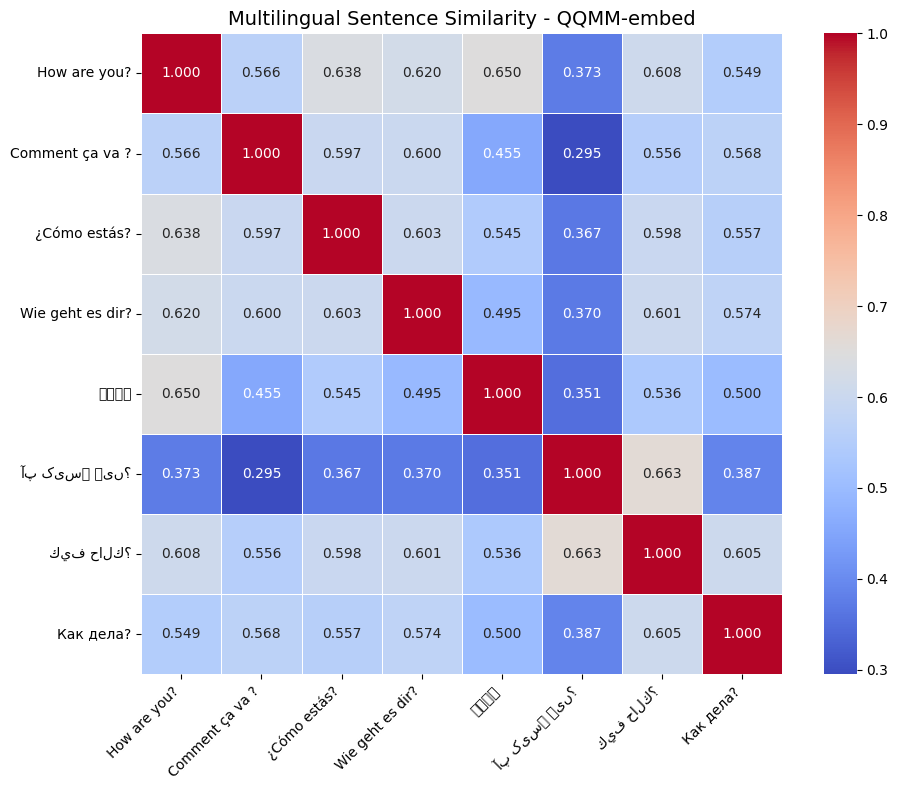

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(sim_df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=.5, square=True)
plt.title("Multilingual Sentence Similarity - QQMM-embed", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **B3_Qwen2_2B**
Testing B3_Qwen2_2B as B3_Qwen2_7B is too heavy for colab to run

```
# This is formatted as code
```



In [ ]:
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Pick model: use 2B for Colab, 7B only for A100 or higher
MODEL_NAME = "raghavlite/B3_Qwen2_2B"  # or "B3_Qwen2_7B"

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Load model on device
model = SentenceTransformer(MODEL_NAME)
model = model.to(device)  # This works for most sbert models

sentences = [
    "How are you?",
    "Comment ça va ?",
    "¿Cómo estás?",
    "Wie geht es dir?",
    "你好了吗?",
    "آپ کیسے ہیں؟",
    "كيف حالك؟",
    "Как дела?"
]

embeddings = model.encode(
    sentences,
    batch_size=2,               # Lower if you get OOM error
    show_progress_bar=True,
    device=device               # Explicitly encode on GPU
)

sim_matrix = cosine_similarity(embeddings)
sim_df = pd.DataFrame(sim_matrix, index=sentences, columns=sentences)
print(sim_df)


Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.bin:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:569: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.language_model.layers.0.self_attn.q_proj.lora_A.default.weight', 'base_model.model.language_model.layers.0.self_attn.q_proj.lora_B.default.weight', 'base_model.model.language_model.layers.0.self_attn.q_proj.lora_magnitude_vector.default.weight', 'base_model.model.language_model.layers.0.self_attn.k_proj.lora_A.default.weight', 'base_model.model.language_model.layers.0.self_attn.k_proj.lora_B.default.weight', 'base_model.model.language_model.layers.0.self_attn.k_proj.lora_magnitude_vector.default.weight', 'base_model.model.language_model.layers.0.self_attn.v_proj.lora_A.default.weight', 'b

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

                  How are you?  Comment ça va ?  ¿Cómo estás?  \
How are you?          1.000000         0.503235      0.370037   
Comment ça va ?       0.503235         1.000000      0.511558   
¿Cómo estás?          0.370037         0.511558      1.000000   
Wie geht es dir?      0.507231         0.624713      0.462646   
你好了吗?                -0.056339        -0.092153     -0.096066   
آپ کیسے ہیں؟         -0.041090         0.019078      0.096879   
كيف حالك؟             0.058814         0.184037      0.222182   
Как дела?             0.327900         0.523733      0.393559   

                  Wie geht es dir?     你好了吗?  آپ کیسے ہیں؟  كيف حالك؟  \
How are you?              0.507231 -0.056339     -0.041090   0.058814   
Comment ça va ?           0.624713 -0.092153      0.019078   0.184037   
¿Cómo estás?              0.462646 -0.096066      0.096879   0.222182   
Wie geht es dir?          1.000000 -0.053886      0.034247   0.177798   
你好了吗?                    -0.053886  1.000000     

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21527 (\N{CJK UNIFIED IDEOGRAPH-5417}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.can

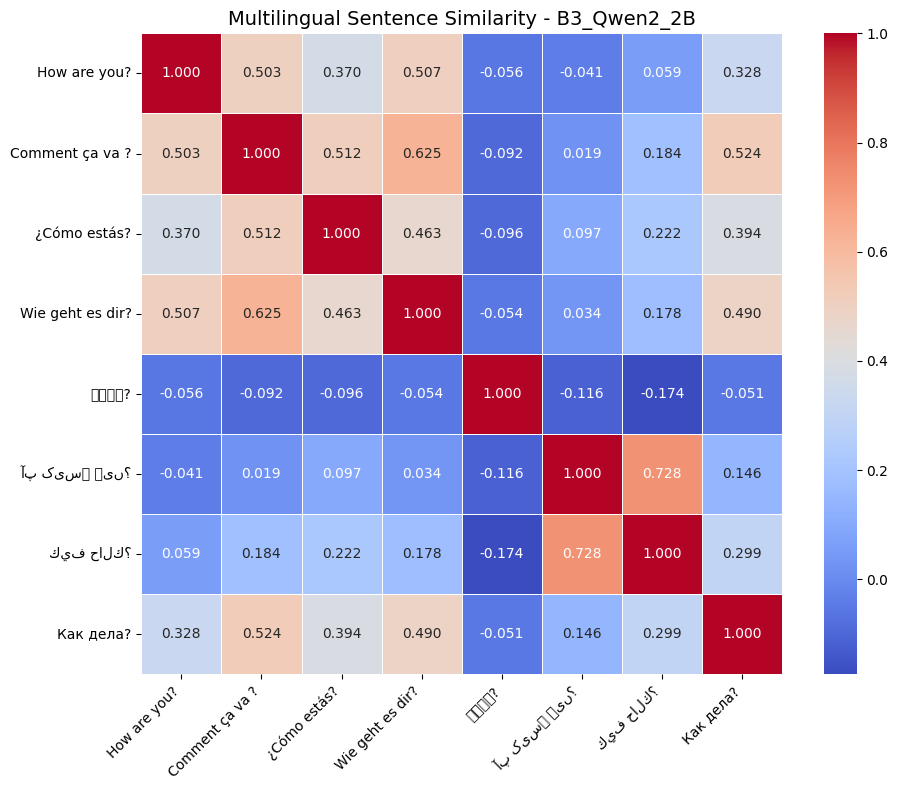

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(sim_df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=.5, square=True)
plt.title("Multilingual Sentence Similarity - B3_Qwen2_2B", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


\# **UniME(LLaVA-OneVision-7B-LoRA-Res336):**

In [ ]:
# UniME Multilingual Embedding Similarity Analysis (Embedding-Only Version)

# Install requirements (Colab only; comment out if already installed)
!pip install torch torchvision transformers accelerate
!pip install matplotlib seaborn pandas numpy scikit-learn Pillow requests -q

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModel, AutoProcessor
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Load model and processor
model_name = "DeepGlint-AI/UniME-LLaVA-OneVision-7B"
print("Loading model...")
processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name,
    trust_remote_code=True,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    device_map="auto" if torch.cuda.is_available() else None,
    load_in_8bit=True if torch.cuda.is_available() else False,
)
model.eval()
print("Model loaded.")

# Test images
test_images = {
    "street": "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=400",
    "food": "https://images.unsplash.com/photo-1490645935967-10de6ba17061?w=400",
    "nature": "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400"
}

def load_image(url):
    try:
        response = requests.get(url)
        return Image.open(BytesIO(response.content)).convert('RGB')
    except Exception as e:
        print(f"Error loading image from {url}: {e}")
        return None

def get_embeddings(image, text_prompt):
    try:
        inputs = processor(text=text_prompt, images=image, return_tensors="pt", padding=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True, return_dict=True)
            embeddings = outputs.hidden_states[-1].mean(dim=1)  # [batch, hidden_dim]
        return embeddings.cpu().numpy()
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return None

# Multilingual prompts
simple_prompts = {
    "English": "What is in this image?",
    "German": "Was ist in diesem Bild?",
    "French": "Qu'est-ce qui est dans cette image?",
    "Spanish": "¿Qué hay en esta imagen?",
    "Italian": "Cosa c'è in questa immagine?"
}

print("\nExtracting multilingual embeddings and calculating similarities...")

# Use first image for all prompts
first_image = load_image(list(test_images.values())[0])
embeddings_data = {}
if first_image:
    for lang, prompt in simple_prompts.items():
        print(f"Processing: {lang}")
        emb = get_embeddings(first_image, prompt)
        if emb is not None:
            embeddings_data[lang] = emb.flatten()

    if len(embeddings_data) > 1:
        langs = list(embeddings_data.keys())
        n = len(langs)
        sim_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                emb1 = embeddings_data[langs[i]].reshape(1, -1)
                emb2 = embeddings_data[langs[j]].reshape(1, -1)
                sim_matrix[i, j] = cosine_similarity(emb1, emb2)[0][0]
        # Visualize as heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(sim_matrix, annot=True, fmt=".3f", xticklabels=langs, yticklabels=langs, cmap='RdYlBu_r')
        plt.title("UniME Embedding Similarity Across Languages")
        plt.show()

        # Print similarities for the report
        print("\nSimilarity matrix:")
        df = pd.DataFrame(sim_matrix, index=langs, columns=langs)
        print(df)

# Clean up CUDA memory (if any)
if torch.cuda.is_available():
    torch.cuda.empty_cache()


Device: cuda
Loading model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocesso

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Model loaded.

Extracting multilingual embeddings and calculating similarities...
Processing: English
Error getting embeddings: Image features and image tokens do not match: tokens: 0, features 1836
Processing: German
Error getting embeddings: Image features and image tokens do not match: tokens: 0, features 1836
Processing: French
Error getting embeddings: Image features and image tokens do not match: tokens: 0, features 1836
Processing: Spanish
Error getting embeddings: Image features and image tokens do not match: tokens: 0, features 1836
Processing: Italian
Error getting embeddings: Image features and image tokens do not match: tokens: 0, features 1836


In [ ]:
from PIL import Image
import torch
import requests
from io import BytesIO
from transformers import AutoModel, AutoProcessor
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

model_name = "DeepGlint-AI/UniME-LLaVA-OneVision-7B"
processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    trust_remote_code=True,
    device_map="auto"  # or "cpu"
)


# Use any image
img_url = "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400"
image = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")

prompts = {
    "English": "<image>Describe this image.",
    "French": "<image>Décris cette image.",
    "German": "<image>Beschreibe dieses Bild.",
    "Spanish": "<image>Describe esta imagen.",
    "Chinese": "<image>描述这张图片。"
}

def get_embedding(image, text):
    inputs = processor(text=text, images=image, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True, return_dict=True)
        emb = outputs.hidden_states[-1].mean(dim=1).cpu().numpy()
    return emb.flatten()

# Get embeddings
langs = list(prompts.keys())
embeddings = [get_embedding(image, prompts[lang]) for lang in langs]
sim_matrix = cosine_similarity(embeddings)
sim_df = pd.DataFrame(sim_matrix, index=langs, columns=langs)
print(sim_df)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocesso

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

          English    French    German   Spanish   Chinese
English  1.000000  0.999990  0.999985  0.999995  0.999993
French   0.999990  1.000000  0.999988  0.999992  0.999985
German   0.999985  0.999988  1.000000  0.999987  0.999978
Spanish  0.999995  0.999992  0.999987  1.000000  0.999990
Chinese  0.999993  0.999985  0.999978  0.999990  1.000000


# **UNITE-Instruct-7B**


In [ ]:
import torch
from transformers import AutoModel, AutoProcessor

model_id = "friedrichor/Unite-Instruct-Qwen2-VL-7B"

model = AutoModel.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

In [ ]:
from sentence_transformers import SentenceTransformer

# Load multilingual sentence embedding model
embedder = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

from PIL import Image
import requests
import torch
from transformers import AutoTokenizer

# Image
img_url = "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400"
image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

# Multilingual prompts
prompts = {
    "English": "<|user|>\n<image>\nDescribe this image.\n<|end|>\n<|assistant|>",
    "French": "<|user|>\n<image>\nDécris cette image.\n<|end|>\n<|assistant|>",
    "German": "<|user|>\n<image>\nBeschreibe dieses Bild.\n<|end|>\n<|assistant|>",
    "Chinese": "<|user|>\n<image>\n请描述这张图片。\n<|end|>\n<|assistant|>"
}

# Run prompts through the model
for lang, prompt in prompts.items():
    print(f"\n--- {lang} ---")

    # Process input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)

    # Generate response
    with torch.no_grad():
        generated_ids = model.generate(**inputs, max_new_tokens=128)
    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    print(response)




--- English ---


AttributeError: 'Qwen2VLModel' object has no attribute 'generate'

Testing different embedding extraction methods...
Trying method 1...
Method 1 failed: Image features and image tokens do not match: tokens: 0, features 140
Trying method 2...
Trying method 1...
Method 1 failed: Image features and image tokens do not match: tokens: 0, features 140
Trying method 2...
Trying method 1...
Method 1 failed: Image features and image tokens do not match: tokens: 0, features 140
Trying method 2...
Trying method 1...
Method 1 failed: Image features and image tokens do not match: tokens: 0, features 140
Trying method 2...
Trying method 1...
Method 1 failed: Image features and image tokens do not match: tokens: 0, features 140
Trying method 2...

Similarity Matrix:
          English    French    German   Spanish   Chinese
English  1.000000  0.998857  0.998330  0.999541  0.998804
French   0.998857  1.000000  0.998516  0.999065  0.998024
German   0.998330  0.998516  1.000000  0.998537  0.997304
Spanish  0.999541  0.999065  0.998537  1.000000  0.998675
Chinese  0.9988

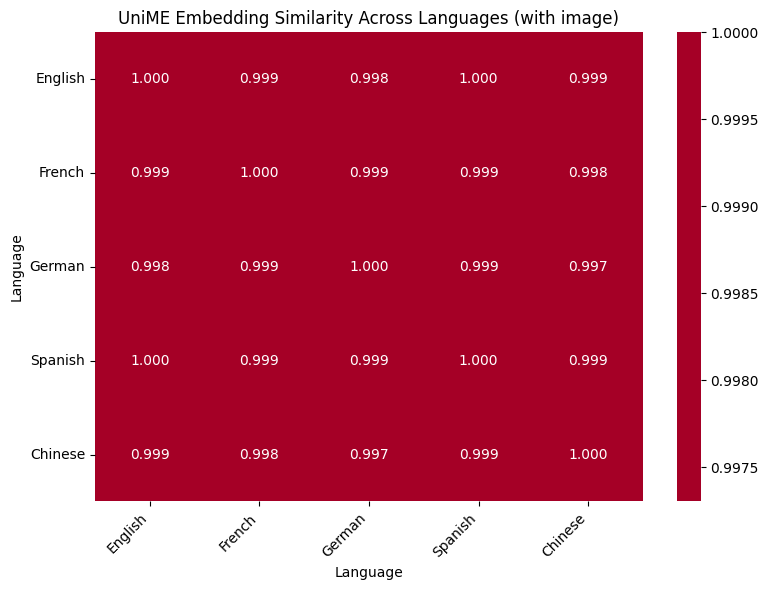

In [ ]:
from PIL import Image
import requests
import torch
from transformers import AutoModel, AutoProcessor
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from io import BytesIO

# Assuming model and processor are already loaded from a previous cell
# model_name = "DeepGlint-AI/UniME-LLaVA-OneVision-7B"
# processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)
# model = AutoModel.from_pretrained(
#     model_name,
#     torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
#     trust_remote_code=True,
#     device_map="auto"  # or "cpu"
# )

# Use any image
img_url = "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400"
image = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")

# Multilingual prompts - FIXED: Remove <image> token from text
prompts = {
    "English": "Describe this image.",
    "French": "Décris cette image.",
    "German": "Beschreibe dieses Bild.",
    "Spanish": "Describe esta imagen.",
    "Chinese": "描述这张图片。"
}

# SOLUTION 1: Let the processor handle image tokens automatically
def get_embedding_v1(image, prompt):
    # Don't include <image> token - let processor handle it
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True, return_dict=True)
        # Get the last hidden state and pool it
        emb = outputs.hidden_states[-1].mean(dim=1).cpu().numpy()
    return emb.flatten()

# SOLUTION 2: Use the processor's chat template if available
def get_embedding_v2(image, prompt):
    try:
        # Try using the processor's chat template
        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "image", "image": image},
                    {"type": "text", "text": prompt}
                ]
            }
        ]

        # Some processors have apply_chat_template method
        if hasattr(processor, 'apply_chat_template'):
            formatted_prompt = processor.apply_chat_template(messages, tokenize=False)
            inputs = processor(images=image, text=formatted_prompt, return_tensors="pt").to(model.device)
        else:
            # Fallback to simple processing
            inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device)

        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True, return_dict=True)
            emb = outputs.hidden_states[-1].mean(dim=1).cpu().numpy()
        return emb.flatten()
    except Exception as e:
        print(f"Error in v2 approach: {e}")
        # Fallback to v1
        return get_embedding_v1(image, prompt)

# SOLUTION 3: Use model.generate() to get embeddings
def get_embedding_v3(image, prompt):
    # For some models, you might need to use generate() first
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        # Try getting embeddings directly from the model
        if hasattr(model, 'get_input_embeddings'):
            # Get text embeddings
            text_embeds = model.get_input_embeddings()(inputs['input_ids'])
            # Average pool the embeddings
            emb = text_embeds.mean(dim=1).cpu().numpy()
        else:
            # Use hidden states from forward pass
            outputs = model(**inputs, output_hidden_states=True, return_dict=True)
            emb = outputs.hidden_states[-1].mean(dim=1).cpu().numpy()
    return emb.flatten()

# SOLUTION 4: Alternative approach with proper image token handling
def get_embedding_v4(image, prompt):
    # Some models expect specific formatting
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": prompt}
            ]
        }
    ]

    try:
        # Try to format with conversation template
        formatted_text = processor.tokenizer.apply_chat_template(
            conversation,
            tokenize=False,
            add_generation_prompt=True
        )
        inputs = processor(images=image, text=formatted_text, return_tensors="pt").to(model.device)
    except:
        # Fallback to simple processing
        inputs = processor(images=image, text=prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True, return_dict=True)
        emb = outputs.hidden_states[-1].mean(dim=1).cpu().numpy()
    return emb.flatten()

# Try different approaches
print("Testing different embedding extraction methods...")

# Choose which method to use (try v1 first, then others if it fails)
def get_embedding(image, prompt):
    methods = [get_embedding_v1, get_embedding_v2, get_embedding_v3, get_embedding_v4]

    for i, method in enumerate(methods, 1):
        try:
            print(f"Trying method {i}...")
            return method(image, prompt)
        except Exception as e:
            print(f"Method {i} failed: {e}")
            if i == len(methods):
                raise e
            continue

# Compute similarities
langs = list(prompts.keys())
try:
    embeddings = [get_embedding(image, prompts[lang]) for lang in langs]
    sim_matrix = cosine_similarity(embeddings)
    sim_df = pd.DataFrame(sim_matrix, index=langs, columns=langs)

    # Display
    print("\nSimilarity Matrix:")
    print(sim_df)

    # Optional: Visualize the similarity matrix as a heatmap
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))
    sns.heatmap(sim_df, annot=True, fmt=".3f", cmap='RdYlBu_r', center=0.5)
    plt.title("UniME Embedding Similarity Across Languages (with image)")
    plt.xlabel("Language")
    plt.ylabel("Language")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"All methods failed. Error: {e}")
    print("\nDebugging information:")
    print(f"Processor type: {type(processor)}")
    print(f"Model type: {type(model)}")

    # Try a simple test
    try:
        test_inputs = processor(images=image, text="Test", return_tensors="pt")
        print(f"Test input keys: {test_inputs.keys()}")
        print(f"Input IDs shape: {test_inputs['input_ids'].shape}")
        if 'pixel_values' in test_inputs:
            print(f"Pixel values shape: {test_inputs['pixel_values'].shape}")
    except Exception as debug_e:
        print(f"Debug test failed: {debug_e}")